In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
deng = pd.read_csv('dengue.csv')
deng

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"]
deng["Month"] = pd.Categorical(deng["Month"], categories=month_order, ordered=True)

In [4]:
summary = deng.describe()
summary

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [5]:
cases_by_year = deng.groupby("Year")["Dengue_Cases"].sum()
deaths_by_year = deng.groupby("Year")["Dengue_Deaths"].sum()
cases_by_region = deng.groupby("Region")["Dengue_Cases"].sum()
deaths_by_region = deng.groupby("Region")["Dengue_Deaths"].sum()
monthly_trends = deng.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum()

<h1> Insight 1 </h1>
<h3>  Dengue Cases Over the Years </h3>

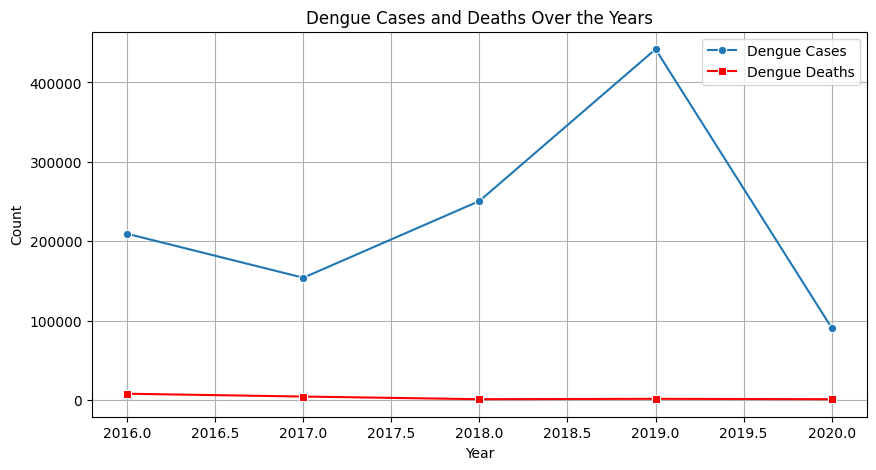

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=cases_by_year.index, y=cases_by_year.values, marker="o", label="Dengue Cases")
sns.lineplot(x=deaths_by_year.index, y=deaths_by_year.values, marker="s", label="Dengue Deaths", color="red")
plt.title("Dengue Cases and Deaths Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

<h1> Insight 2 </h1>
<h3>  Dengue Cases by Region </h3>

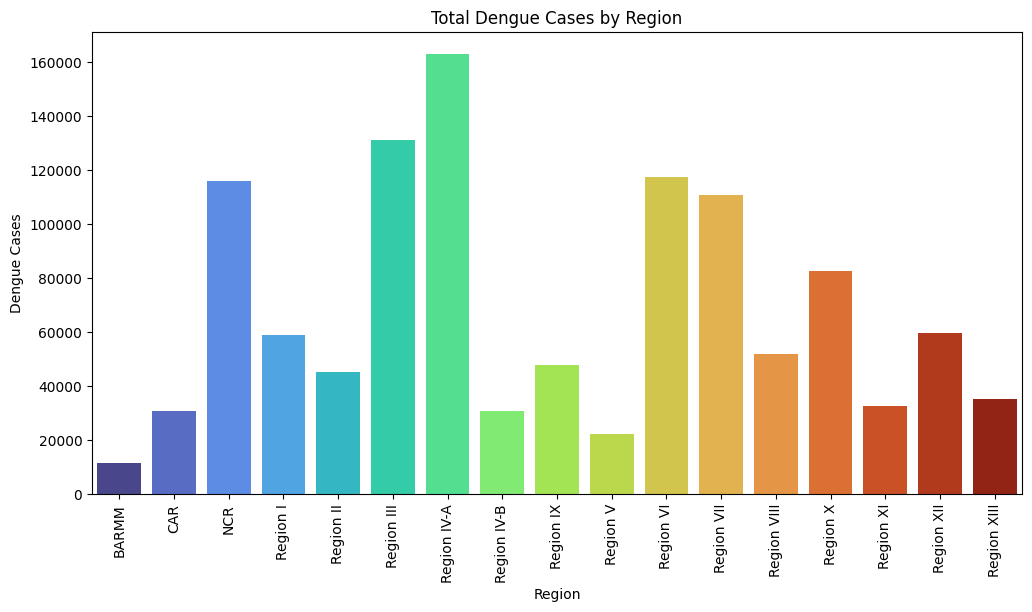

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cases_by_region.index, y=cases_by_region.values, palette="turbo")
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=90)
plt.show()

<h1> Insight 3 </h1>
<h3>  Monthly Trends in Dengue Cases and Deaths </h3>

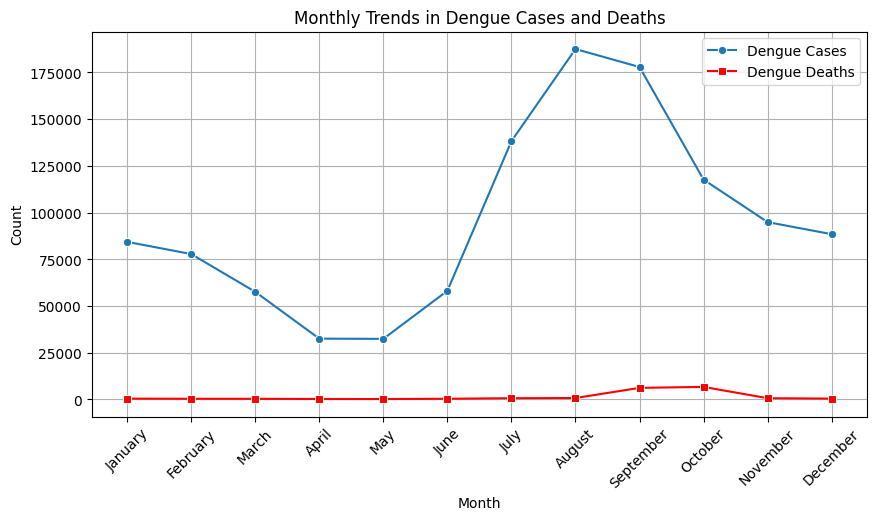

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trends.index, y=monthly_trends["Dengue_Cases"], marker="o", label="Dengue Cases")
sns.lineplot(x=monthly_trends.index, y=monthly_trends["Dengue_Deaths"], marker="s", label="Dengue Deaths", color="red")
plt.title("Monthly Trends in Dengue Cases and Deaths")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

<h1> Insight 4 </h1>
<h3>  Heatmap of Cases & Deaths per Region </h3>

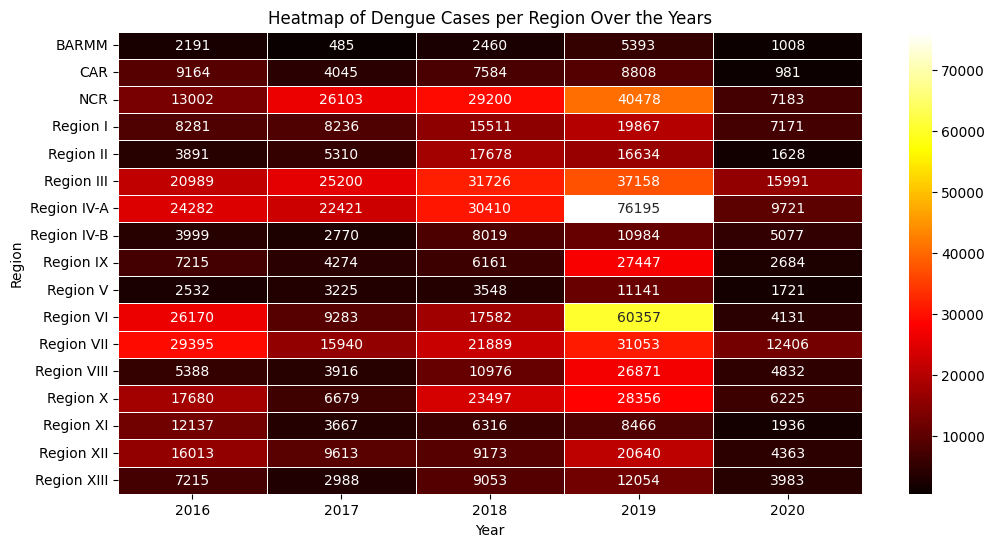

In [9]:
heatmap_data = deng.pivot_table(index="Region", columns="Year", values="Dengue_Cases", aggfunc="sum")
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="hot", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Dengue Cases per Region Over the Years")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()

<h1> Insight 5 </h1>
<h3>  Proportion of Dengue Cases by Region </h3>

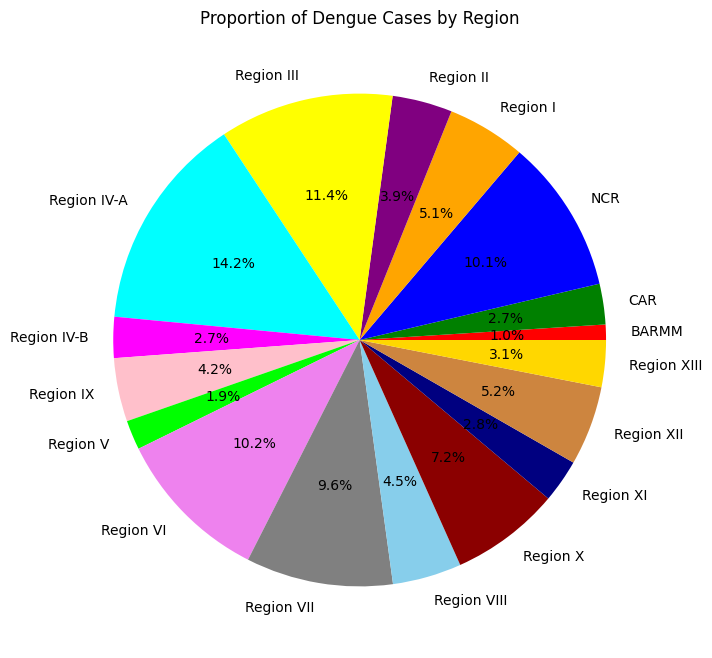

In [10]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'pink', 'lime', 'violet', 'gray', 'skyblue', 'darkred', 'navy', 'peru', 'gold']
plt.figure(figsize=(8, 8))
plt.pie(cases_by_region, labels=cases_by_region.index, autopct='%1.1f%%', colors=colors[:len(cases_by_region)])
plt.title("Proportion of Dengue Cases by Region")
plt.show()

<h1> Insight 6 </h1>
<h3>  Proportion of Dengue Cases by Regionn </h3>

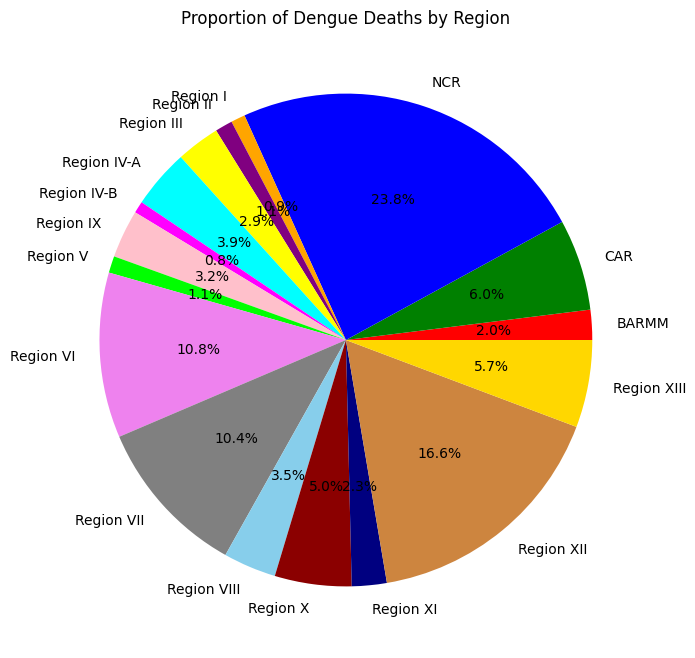

In [11]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'pink', 'lime', 'violet', 'gray', 'skyblue', 'darkred', 'navy', 'peru', 'gold']
plt.figure(figsize=(8, 8))
plt.pie(deaths_by_region, labels=deaths_by_region.index, autopct='%1.1f%%', colors=colors[:len(deaths_by_region)])
plt.title("Proportion of Dengue Deaths by Region")
plt.show()

<h1> Insight 7 </h1>
<h3>  Deaths-to-Cases Ratio by Region </h3>

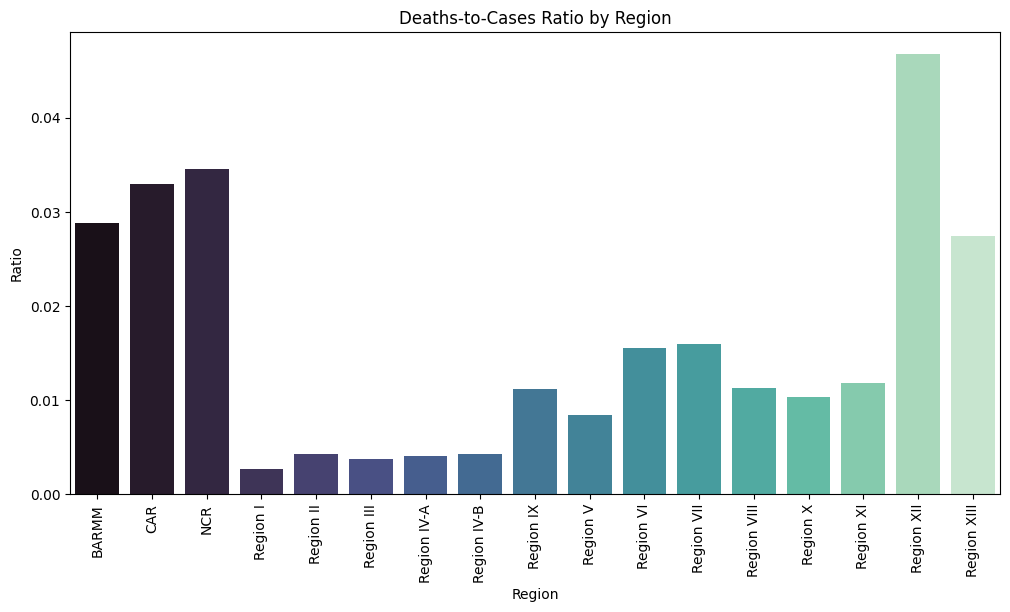

In [12]:
death_case_ratio = deaths_by_region / cases_by_region
plt.figure(figsize=(12, 6))
sns.barplot(x=death_case_ratio.index, y=death_case_ratio.values, palette="mako")
plt.title("Deaths-to-Cases Ratio by Region")
plt.xlabel("Region")
plt.ylabel("Ratio")
plt.xticks(rotation=90)
plt.show()

<h1> Insight 8 </h1>
<h3>  Yearly Death Rate (Deaths per Case) </h3>

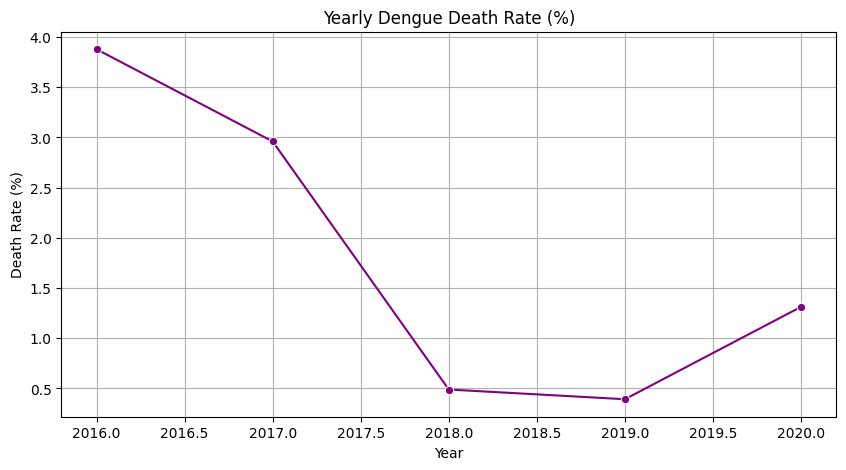

In [13]:
death_rate_by_year = deaths_by_year / cases_by_year * 100
plt.figure(figsize=(10, 5))
sns.lineplot(x=death_rate_by_year.index, y=death_rate_by_year.values, marker="o", color="purple")
plt.title("Yearly Dengue Death Rate (%)")
plt.xlabel("Year")
plt.ylabel("Death Rate (%)")
plt.grid()
plt.show()

<h1> Insight 9 </h1>
<h3>  Average Monthly Cases Over the Years </h3>

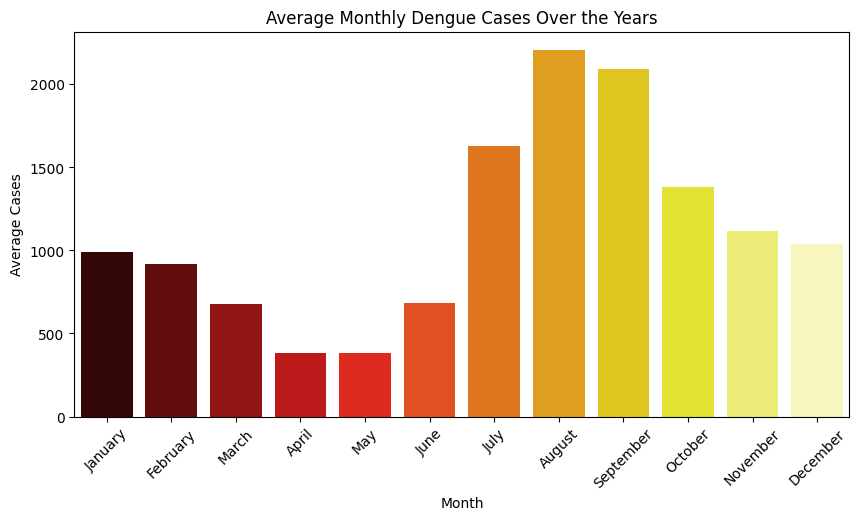

In [14]:
monthly_avg_cases = deng.groupby("Month")["Dengue_Cases"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg_cases.index, y=monthly_avg_cases.values, palette="hot")
plt.title("Average Monthly Dengue Cases Over the Years")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 10 </h1>
<h3>  Monthly Cases Over the Years </h3>

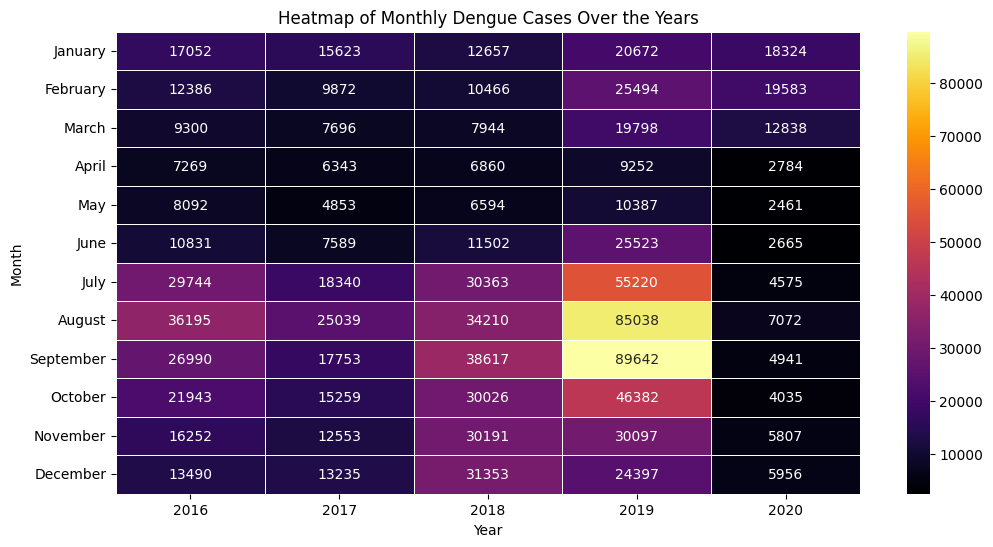

In [15]:
monthly_cases_heatmap = deng.pivot_table(index="Month", columns="Year", values="Dengue_Cases", aggfunc="sum")
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_cases_heatmap, cmap="inferno", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Monthly Dengue Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

<h1> Insight 11 </h1>
<h3>  Relationship Between Dengue Cases and Deaths </h3>

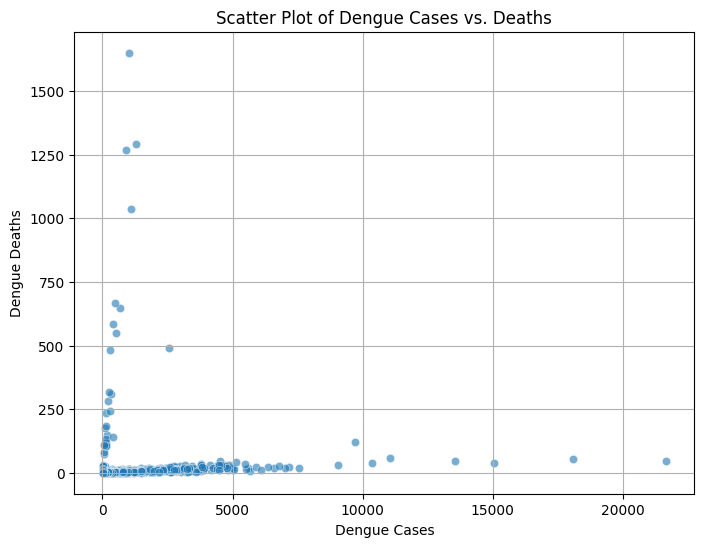

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=deng["Dengue_Cases"], y=deng["Dengue_Deaths"], alpha=0.6)
plt.title("Scatter Plot of Dengue Cases vs. Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid()
plt.show()

<h1> Insight 12 </h1>
<h3> Top 5 Regions with Highest Dengue Cases </h3>

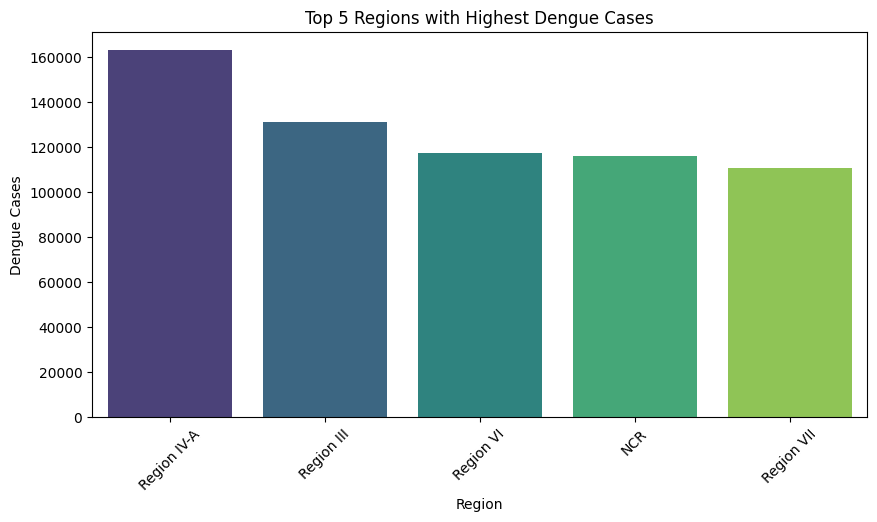

In [17]:
top_regions = cases_by_region.nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette="viridis")
plt.title("Top 5 Regions with Highest Dengue Cases")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 13 </h1>
<h3>  Distribution of Dengue Cases </h3>

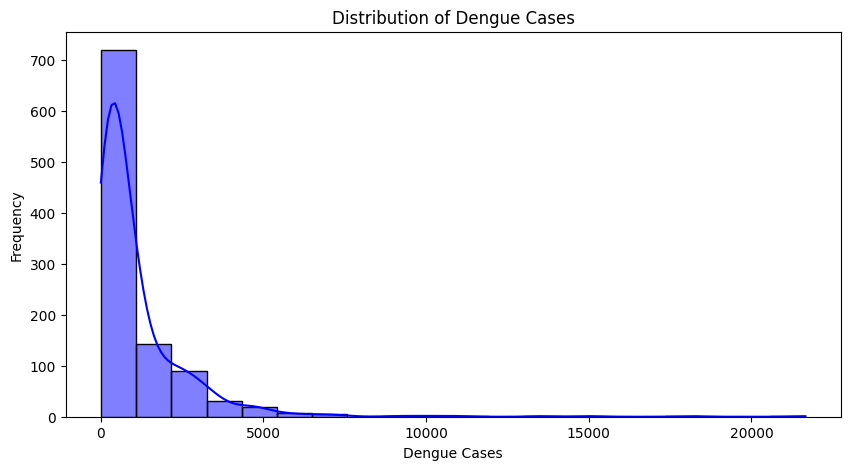

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(deng["Dengue_Cases"], bins=20, kde=True, color="blue")
plt.title("Distribution of Dengue Cases")
plt.xlabel("Dengue Cases")
plt.ylabel("Frequency")
plt.show()

<h1> Insight 13 </h1>
<h3>  Dengue Cases by Region (Top 5)</h3>

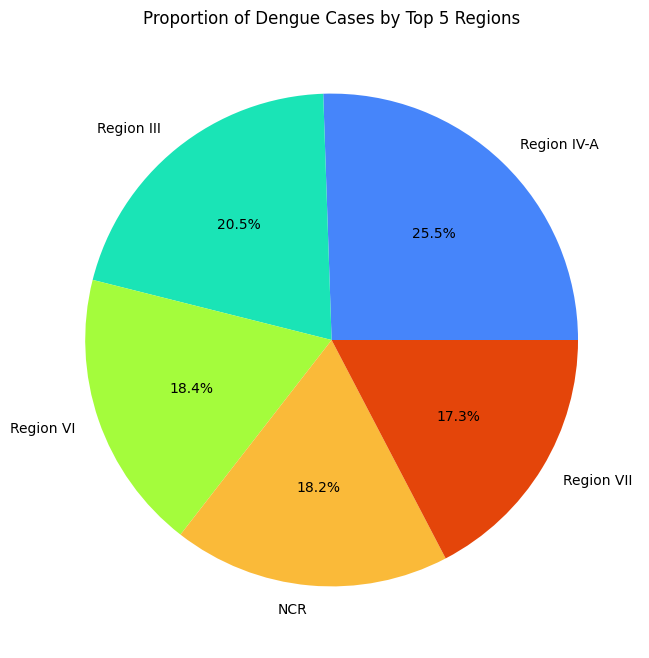

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=top_regions.index, autopct="%1.1f%%", colors=sns.color_palette("turbo", 5))
plt.title("Proportion of Dengue Cases by Top 5 Regions")
plt.show()

<h1> Insight 14 </h1>
<h3>  Yearly Distribution of Dengue Deaths </h3>

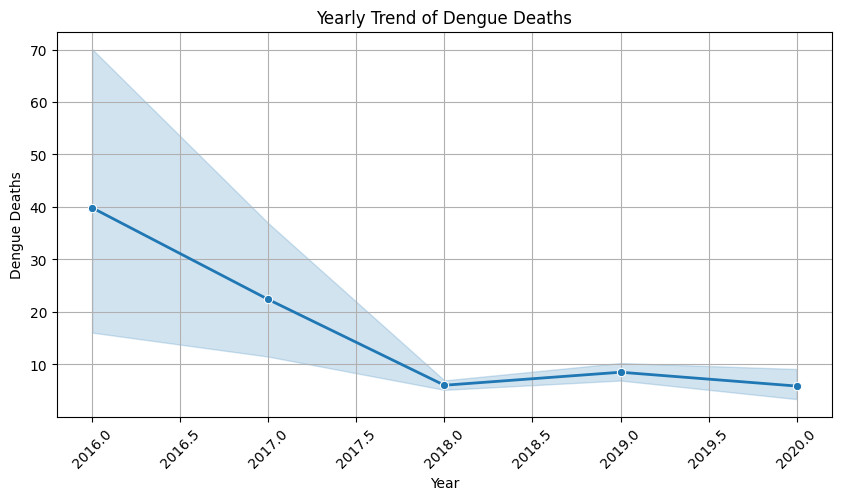

In [38]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Dengue_Deaths", data=deng, marker="o", linewidth=2)
plt.xticks(rotation=45)
plt.title("Yearly Trend of Dengue Deaths")
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

<h1> Insight 15 </h1>
<h3>  Total Dengue Cases vs. Total Deaths by Region </h3>

<Figure size 1200x600 with 0 Axes>

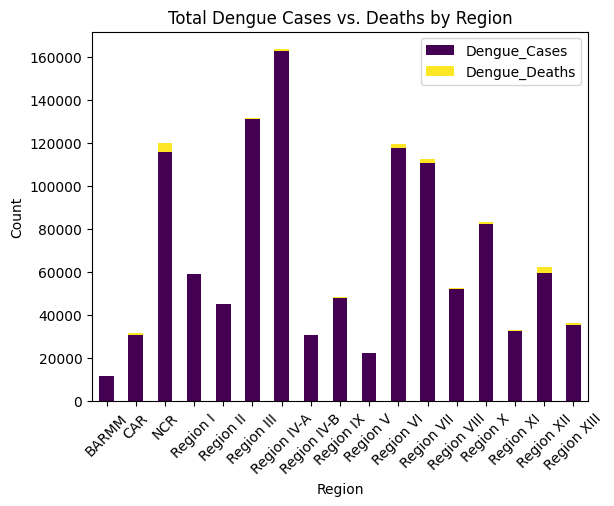

In [46]:
region_totals = deng.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum()
plt.figure(figsize=(12, 6))
region_totals.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Total Dengue Cases vs. Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 16 </h1>
<h3> Monthly Dengue Cases Distribution </h3>

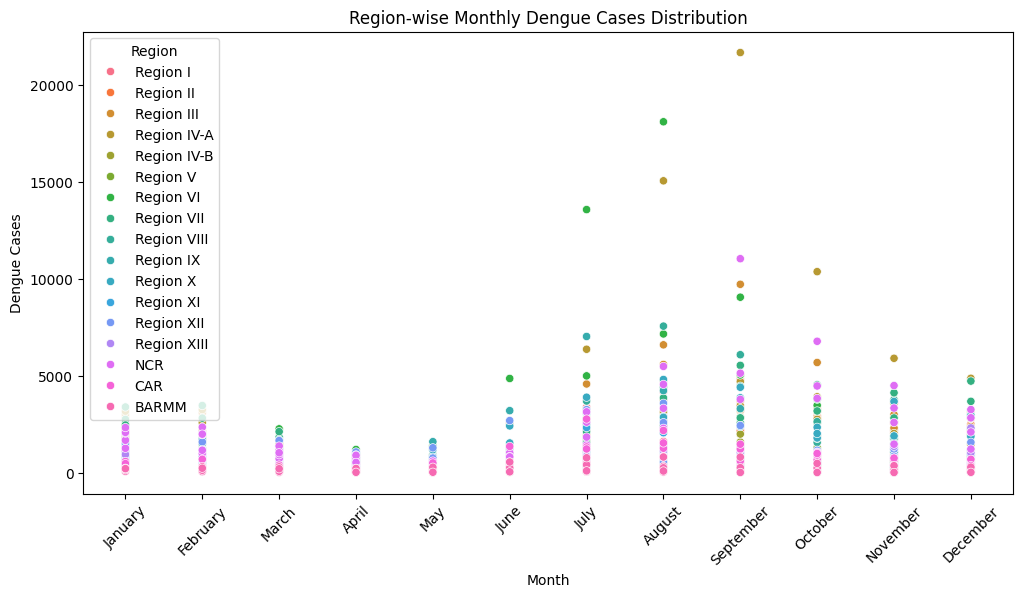

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Month", y="Dengue_Cases", hue="Region", data=deng)
plt.title("Region-wise Monthly Dengue Cases Distribution")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 17 </h1>
<h3>  Monthly Trend of Dengue Cases Over Multiple Years </h3>

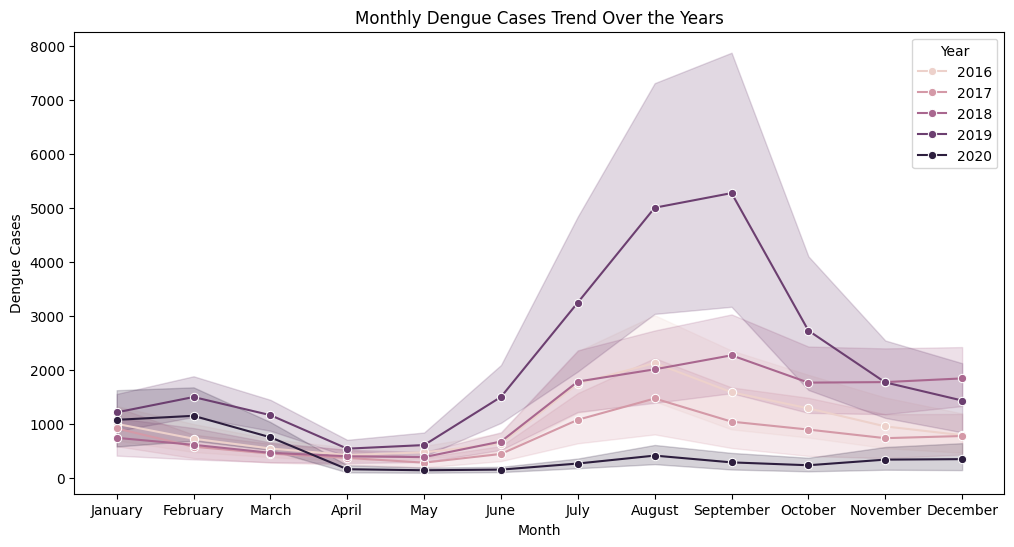

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Dengue_Cases", hue="Year", data=deng, marker="o")
plt.title("Monthly Dengue Cases Trend Over the Years")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.show()

<h1> Insight 18 </h1>
<h3>  Yearly Dengue Cases Distribution </h3>

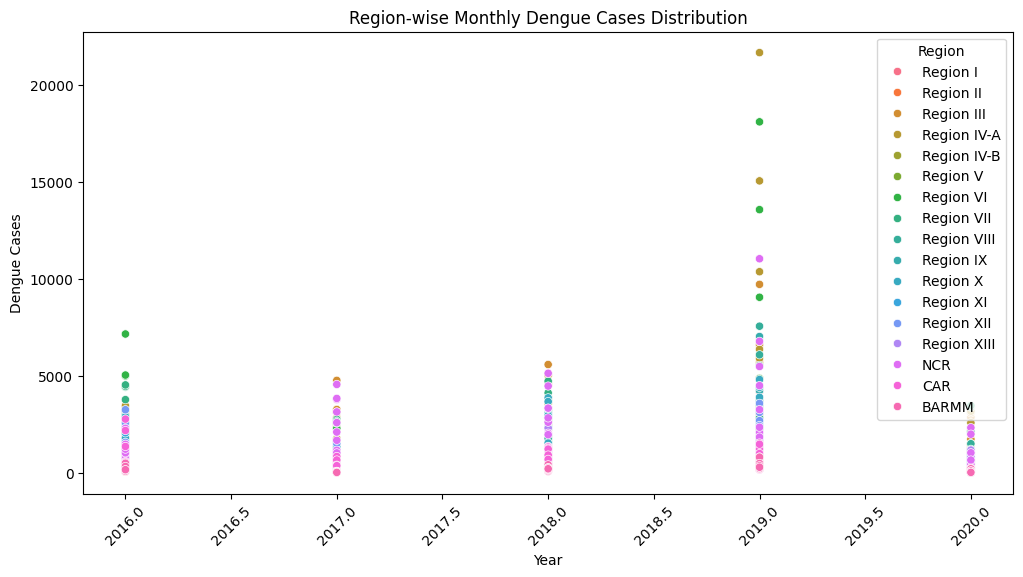

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Year", y="Dengue_Cases", hue="Region", data=deng)
plt.title("Region-wise Monthly Dengue Cases Distribution")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 19 </h1>
<h3>  Count of Dengue Deaths in 2016 </h3>

In [75]:
deaths_2016 = deng[deng["Year"] == 2016]["Dengue_Deaths"].sum()
print(f"Total Dengue Deaths in 2016: {deaths_2016}")

Total Dengue Deaths in 2016: 8127


<h1> Insight 20 </h1>
<h3>  Count of Dengue Cases found in 2019 </h3>

In [77]:
deaths_2019 = deng[deng["Year"] == 2019]["Dengue_Cases"].sum()
print(f"Total Dengue Deaths in 2019: {deaths_2019}")

Total Dengue Deaths in 2019: 441902
